## Importing Libraries

In [427]:
import numpy as np
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer,LabelBinarizer, StandardScaler,LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from pandas.tools.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


## Loading Data

In [301]:
who = pd.read_csv("/home/ea/Downloads/who_suicide_statistics.csv.zip")
who.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


## Visualising the Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc885506860>,
      dtype=object)

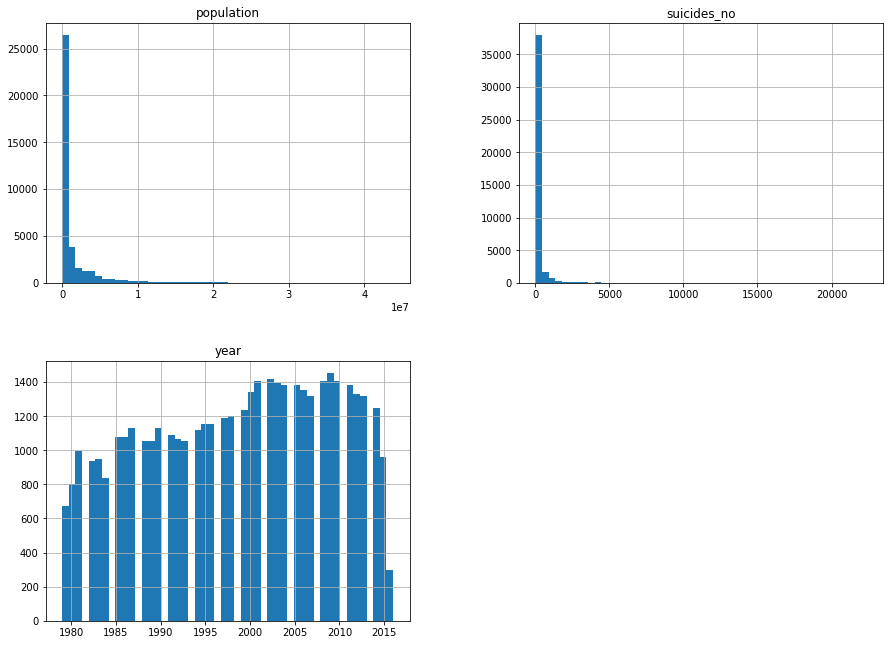

In [207]:
who.hist(bins = 50,figsize = (15,11))

In [409]:
corr = who.corr()
corr


,year,suicides_no,population
year,1.000000,-0.011985,0.027016
suicides_no,-0.011985,1.000000,0.611406
population,0.027016,0.611406,1.000000


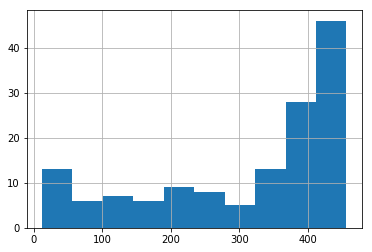

In [210]:
new = who["country"].value_counts()
new.hist()

/home/ea/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc882a6b9b0>,
      dtype=object)

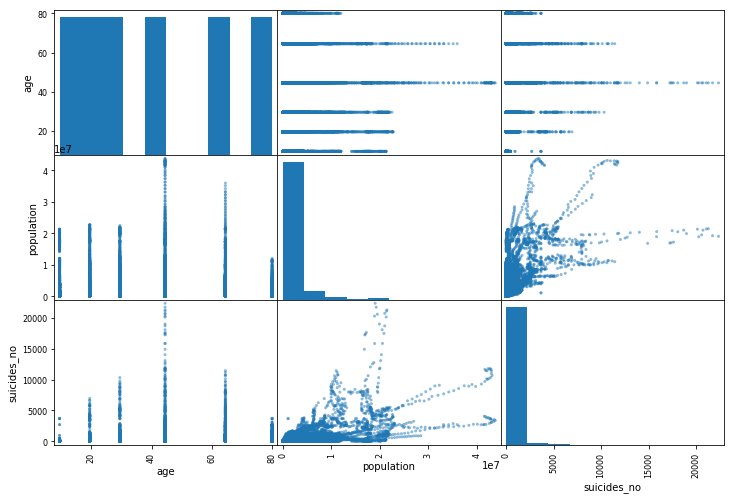

In [418]:
attributes = ['age','population','suicides_no']
scatter_matrix(who_prepd[attributes],figsize=(12,8))

In [264]:
nnn = who.loc[who['country'] == 'Albania']

In [265]:
nnn['suicides_no'].mean()

7.462121212121212

## Data Cleaning and Feature Engineering

#### Handeling missing values in features "suicides_no" and "population"

In [362]:
who_test = who.copy()
who_test["suicides_no"].fillna(who_test.groupby("country")["suicides_no"].transform("mean"), inplace=True)
who_upd['suicides_no'] = who_upd['suicides_no'].apply(np.floor)
who_test["population"].fillna(who_test.groupby("country")["population"].transform("mean"), inplace=True)
who_new = who_test.dropna()

#### Coverting the age catagorical feature to age_mean 

In [352]:
who_upd = who_new.copy()
def split_mean(x):
    if '75+' not  in x:
        x_spl = x.split(' ')
        split_list = x_spl[0].split('-')
        mean = (float(split_list[0])+float(split_list[1]))/2
        return mean
    else:
        return 80.0

who_upd['age_mean'] = who_upd['age'].apply(lambda x: split_mean(x))
#who_upd['age_mean'].fillna(80,inplace=True)

In [345]:
#who_new['population'].isna().sum()

#### Dropping Features "country" and "age" 

In [354]:
who_upd.drop('country',axis=1,inplace=True)
who_upd.drop('age',axis=1,inplace=True)

Checking if there is any NaN values present

In [351]:
who_upd.isnull().sum()

year           0
sex            0
suicides_no    0
population     0
age_mean       0
dtype: int64

In [361]:
who_upd

,year,sex,suicides_no,population,age_mean
0,1985,female,7.0,277900.0,19.5
1,1985,female,7.0,246800.0,29.5
2,1985,female,7.0,267500.0,44.5
3,1985,female,7.0,298300.0,9.5
4,1985,female,7.0,138700.0,64.5
5,1985,female,7.0,34200.0,80.0
6,1985,male,7.0,301400.0,19.5
7,1985,male,7.0,264200.0,29.5
8,1985,male,7.0,296700.0,44.5
9,1985,male,7.0,325800.0,9.5


#### Encoding catogrical variable "sex"

In [408]:
labelencoder = LabelEncoder()
who_upd['sex'] = labelencoder.fit_transform(who_upd['sex'])
onehotencoder = OneHotEncoder(categorical_features = [1],sparse=True)
new = onehotencoder.fit_transform(who_upd).toarray()
who_prepd = pd.DataFrame(new)
who_prepd.columns = ['female','male','year','suicides_no','population','age']


In [400]:
who_prepd

,female,male,year,suicides_no,population,age
0,1.0,0.0,1985.0,7.0,277900.0,19.5
1,1.0,0.0,1985.0,7.0,246800.0,29.5
2,1.0,0.0,1985.0,7.0,267500.0,44.5
3,1.0,0.0,1985.0,7.0,298300.0,9.5
4,1.0,0.0,1985.0,7.0,138700.0,64.5
5,1.0,0.0,1985.0,7.0,34200.0,80.0
6,0.0,1.0,1985.0,7.0,301400.0,19.5
7,0.0,1.0,1985.0,7.0,264200.0,29.5
8,0.0,1.0,1985.0,7.0,296700.0,44.5
9,0.0,1.0,1985.0,7.0,325800.0,9.5


## Splitting Data

In [487]:
who_prepd_y = who_prepd['suicides_no']
who_prepd_x = who_prepd.drop('suicides_no',axis=1)
who_prepd_x.shape

(40008, 5)

In [491]:
x_train, x_test, y_train, y_test = train_test_split(who_prepd_x,who_prepd_y, test_size = 1/3, random_state = 0)

In [495]:
x_train.shape

(26672, 5)

## Training Model

### Linear Regression

In [499]:
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [500]:
some_x = x_train[0:5]
some_y = y_train[:5]
print("Predictions:", linear_reg.predict(some_x))

Predictions: [ 334.27840379 -148.79066215 1271.2747309     7.06360012  158.91844144]


In [505]:
from sklearn.metrics import mean_squared_error
who_predictions = linear_reg.predict(x_train)
lin_mse = mean_squared_error(y_train,who_predictions)
lin_rmse = np.sqrt(lin_mse)

In [506]:
lin_rmse

647.7373549091299

### Decision Tree

In [464]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [510]:
who_predictions1 = tree_reg.predict(x_train)
tree_mse = mean_squared_error(y_train, who_predictions1)
tree_rmse = np.sqrt(tree_mse)
tree_rmse


3062.755969867875

In [509]:
who_predictions2 = tree_reg.predict(x_test)
tree_mse = mean_squared_error(y_test, who_predictions2)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

3059.966466277866

In [474]:
who_predictions1

array([  0.,  71.,  18., ..., 246.,  12., 108.])

In [511]:
from	sklearn.model_selection	import	cross_val_score
scores	=	cross_val_score(tree_reg,	x_train,	y_train, scoring="neg_mean_squared_error",	cv=10)
tree_rmse_scores	=	np.sqrt(-scores)

In [514]:
def	display_scores(scores):
    print("Scores:",	scores)
    print("Mean:",	scores.mean())
    print("Standard deviation:",	scores.std())

display_scores(tree_rmse_scores)

Scores: [431.56724658 656.74820191 337.23773559 415.44894661 409.25301121
 694.8831734  499.80239777 523.91656038 669.60725356 551.27006254]
Mean: 518.973458955761
Standard deviation: 117.24986241617498


### Random Forest

In [516]:
from	sklearn.ensemble	import	RandomForestRegressor
forest_reg	=	RandomForestRegressor()
forest_reg.fit(x_train,	y_train)
who_predictions_f = tree_reg.predict(x_train)
forest_mse = mean_squared_error(y_train, who_predictions_f)
forest_rmse = np.sqrt(tree_mse)
forest_rmse
#display_scores(forest_rmse_scores)

3062.755969867875